# Ejercicio 3

En este ejercicio realizaremos una modificación en el codigo de filtro para que use como valor final, la mediana del pixel consultado y sus 8 vecinos.

Este filtro se utiliza para eliminar el ruido de sal y pimienta, el cual produce un cambio a valores extremos a pixeles aleatorios.

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import ipynb.fs.defs.Ejercicio_1 as ej1

imagen = cv.imread('imgpack/WorldView_1-1_PAN.png',cv.IMREAD_GRAYSCALE)

In [2]:
# En esta función usaremos un bucle para seleccionar el valor mediana de una lista compuesta por los
# valores del pixel consultado y sus 8 vecinos.
def aux(img,a,b):
    
    p = list()
    
    for i in range(-1,2):
        for j in range(-1,2):
            p.append(img[a+i][b+j])
            
    return int(np.median(p))

In [3]:
def mediana(img):
    
    resimg = img.copy()
    
    # En este caso se usara un filtro de mediana para una base 3x3, por lo tanto solo se eliminaran
    # las filas y columnas extremas de la matriz de la imagen.
    for i in range(len(resimg)):
            resimg[0] = 0
            resimg[i][0] = 0
            resimg[i][-1] = 0
            resimg[-1] = 0
    
    for i in range(len(resimg)):
        for j in range(len(resimg[i])):
            if(not(i==0 or j == 0 or i == len(resimg)-1 or j == len(resimg[i])-1)):
                resimg[i][j] = aux(img,i,j)
    
    return resimg

In [4]:
ejemplo = np.array([[12,14,17,24,32,30],
                    [19,18,17,26,36,40],
                    [26,21,17,28,40,42],
                    [20,19,18,26,33,35],
                    [14,17,20,23,27,20],
                    [35,14,22,13,40,21]])
print(mediana(ejemplo))

[[ 0  0  0  0  0  0]
 [ 0 17 18 26 32  0]
 [ 0 19 19 26 35  0]
 [ 0 19 20 26 28  0]
 [ 0 19 19 23 26  0]
 [ 0  0  0  0  0  0]]


In [5]:
img = mediana(imagen)

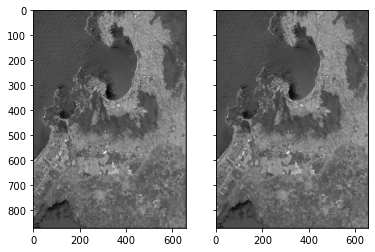

In [6]:
# A continuación mostraremos las diferencias entre la imagen original y a la que se le aplica
# el filtro de mediana, sin embargo, la definición de las imagenes en jupyter notebook apenas
# deja apreciar el ruido de sal y pimienta en la primera imagen.

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(imagen, cmap='gray', aspect='auto')
ax2.imshow(img, cmap='gray', aspect='auto')

In [7]:
cv.imwrite("soluciones/EJ3_Imagen_Filtrada.png", img)

True